In [1]:
import math

import matplotlib.pyplot as plt

# Unit Circle

Instead of ratios; use unit circle.

![Measure Lengths on Circle](./images/measure_lengths.jpg)

My measured numbers were:

```
No turn   0,
1/32 turn 1.9
1/16 turn 3.8
3/32 turn 5.4
1/8  turn 6.9
5/32 turn 8.1
3/16 turn 8.9
7/32 turn 9.5
1/4  turn 9.7 (the radius) 
```

In [2]:
# Let's convert these first of lengths on a unit circle
# (divide by the radius)
radius = 9.7
unit_circle_measurements_to_quarter_turn = [
    length / radius
    for length in [0, 1.9, 3.8, 5.4, 6.9, 8.1, 8.9, 9.5, 9.7] 
]
unit_circle_measurements_to_quarter_turn

[0.0,
 0.1958762886597938,
 0.3917525773195876,
 0.5567010309278352,
 0.7113402061855671,
 0.8350515463917526,
 0.9175257731958764,
 0.9793814432989691,
 1.0]

In [3]:
# We don't need to measure quarter turn to a half turn
# we can see from the mirror symmetry that it's the same as the
# above in reverse
unit_circle_measurements_to_half_turn = (
    unit_circle_measurements_to_quarter_turn +
    unit_circle_measurements_to_quarter_turn[::-1][1:]
)
unit_circle_measurements_to_half_turn

[0.0,
 0.1958762886597938,
 0.3917525773195876,
 0.5567010309278352,
 0.7113402061855671,
 0.8350515463917526,
 0.9175257731958764,
 0.9793814432989691,
 1.0,
 0.9793814432989691,
 0.9175257731958764,
 0.8350515463917526,
 0.7113402061855671,
 0.5567010309278352,
 0.3917525773195876,
 0.1958762886597938,
 0.0]

In [4]:
# From a half turn to a full turn the heights are the same as above
# But negative given they are now below the central line
unit_circle_measurements_to_full_turn = (
    unit_circle_measurements_to_half_turn + [
        -measurement
        for measurement in unit_circle_measurements_to_half_turn[1:-1]
    ]
)
unit_circle_measurements_to_full_turn

[0.0,
 0.1958762886597938,
 0.3917525773195876,
 0.5567010309278352,
 0.7113402061855671,
 0.8350515463917526,
 0.9175257731958764,
 0.9793814432989691,
 1.0,
 0.9793814432989691,
 0.9175257731958764,
 0.8350515463917526,
 0.7113402061855671,
 0.5567010309278352,
 0.3917525773195876,
 0.1958762886597938,
 0.0,
 -0.1958762886597938,
 -0.3917525773195876,
 -0.5567010309278352,
 -0.7113402061855671,
 -0.8350515463917526,
 -0.9175257731958764,
 -0.9793814432989691,
 -1.0,
 -0.9793814432989691,
 -0.9175257731958764,
 -0.8350515463917526,
 -0.7113402061855671,
 -0.5567010309278352,
 -0.3917525773195876,
 -0.1958762886597938]

In [5]:
# We should now have 32 measurements
len(unit_circle_measurements_to_full_turn)

32

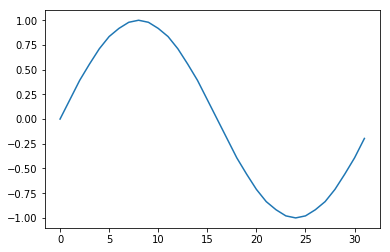

In [6]:
# Lets Have a look what this looks like
x_coords = range(32)
y_coords = unit_circle_measurements_to_full_turn
plt.plot(x_coords, y_coords)
plt.show()

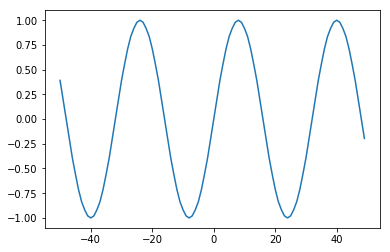

In [7]:
# Once we've gone once fully around the circle we're back to
# where we started back at zero so the pattern will just repeat
# as we go round and round.
# We can take the modulus to write a function to repeat the pattern
x_coords = range(-50, 50)
y_coords = [
    unit_circle_measurements_to_full_turn[x % 32]
    for x in x_coords
]
plt.plot(x_coords, y_coords)
plt.show()


In [8]:
# Let's put that all together into a function
def extend_measurements_to_full_circle(radius, quarter_turn_measurements):

    measurements = quarter_turn_measurements

    # Bit of house keeping - do we have the no turn and
    # quarter turn measurement?
    if not measurements or measurements[0] != 0:
        measurements = [0] + measurements
    if measurements[-1] != radius:
        measurements.append(radius)
        
    # Convert to unit circle:
    measurements = [length / radius for length in measurements]
    
    # Extend to half circle by reversing the list of measurements
    measurements = measurements + measurements[::-1][1:]
    
    # Extend to full circle by adding the same negative measurements
    measurements += [
        -measurement
        for measurement in measurements[1:-1]
    ]
    return measurements

In [9]:
# Let's just sanity check that it worked
full_circle_measurements = extend_measurements_to_full_circle(
    radius=9.7,
    quarter_turn_measurements=[1.9, 3.8, 5.4, 6.9, 8.1, 8.9, 9.5]
)
assert len(full_circle_measurements) == 32
assert max(full_circle_measurements) == 1.0
assert min(full_circle_measurements) == -1.0
assert full_circle_measurements[0] == 0

From this we're going to build our own trigonometric functions.

If we don't have an exact measurement we will take a weighted average
between the two measurements either side.

These functions will take an angle rather than a proportion of how
far around the circle.

The following builder builds both a sin and cosine function from your quarter turn measurements.

In [10]:
def trigonometric_function_builder(radius, quarter_turn_measurements):
    '''Build a sin and cosine function from these measurements.'''
    y_measurements = extend_measurements_to_full_circle (
        radius,
        quarter_turn_measurements
    )
    
    x_start_index = len(y_measurements) // 4
    x_measurements = y_measurements[x_start_index:] + y_measurements[0:x_start_index]
    
    def trig_func(angle, measurements):
        # Convert angle to fraction of way around circle
        # 2 * pi is the length of the unit circle:
        fraction = (angle / (2 * math.pi)) % 1
        
        # Going to take a weighted average of the two closest measurements.
        # For instance if we are 60% of the way around the circle and we
        # have four measurements we 0.6 * 4 = 2.4 so the measurement is
        # in between measurement 2 (The 50% measurement) and measurement 3
        # (the 75% measurement). Given it's 20% closer to index 2 we'll take
        # a weighted average of %60 of the index 2 reading and 40% of the
        # index 3 reading.
        index = fraction * len(measurements)

        # Look at the two measurements either side of this index
        first_index = math.floor(index)
        # If the first index is the last reading we cycle around
        # to take the first reading
        second_index = (first_index + 1) % len(measurements)
        proportion_second = index - first_index
        
        return (
            (1 - proportion_second) * measurements[first_index] +
            proportion_second * measurements[second_index]
        )
    
    def my_sin(angle):
        return trig_func(angle, y_measurements)
    
    def my_cos(angle):
        return trig_func(angle, x_measurements)
    
    return my_sin, my_cos

In [11]:
my_sin, my_cos = trigonometric_function_builder(
    radius=9.7,
    quarter_turn_measurements=[1.9, 3.8, 5.4, 6.9, 8.1, 8.9, 9.5]
)

In [12]:
my_cos(2 * math.pi)

1.0

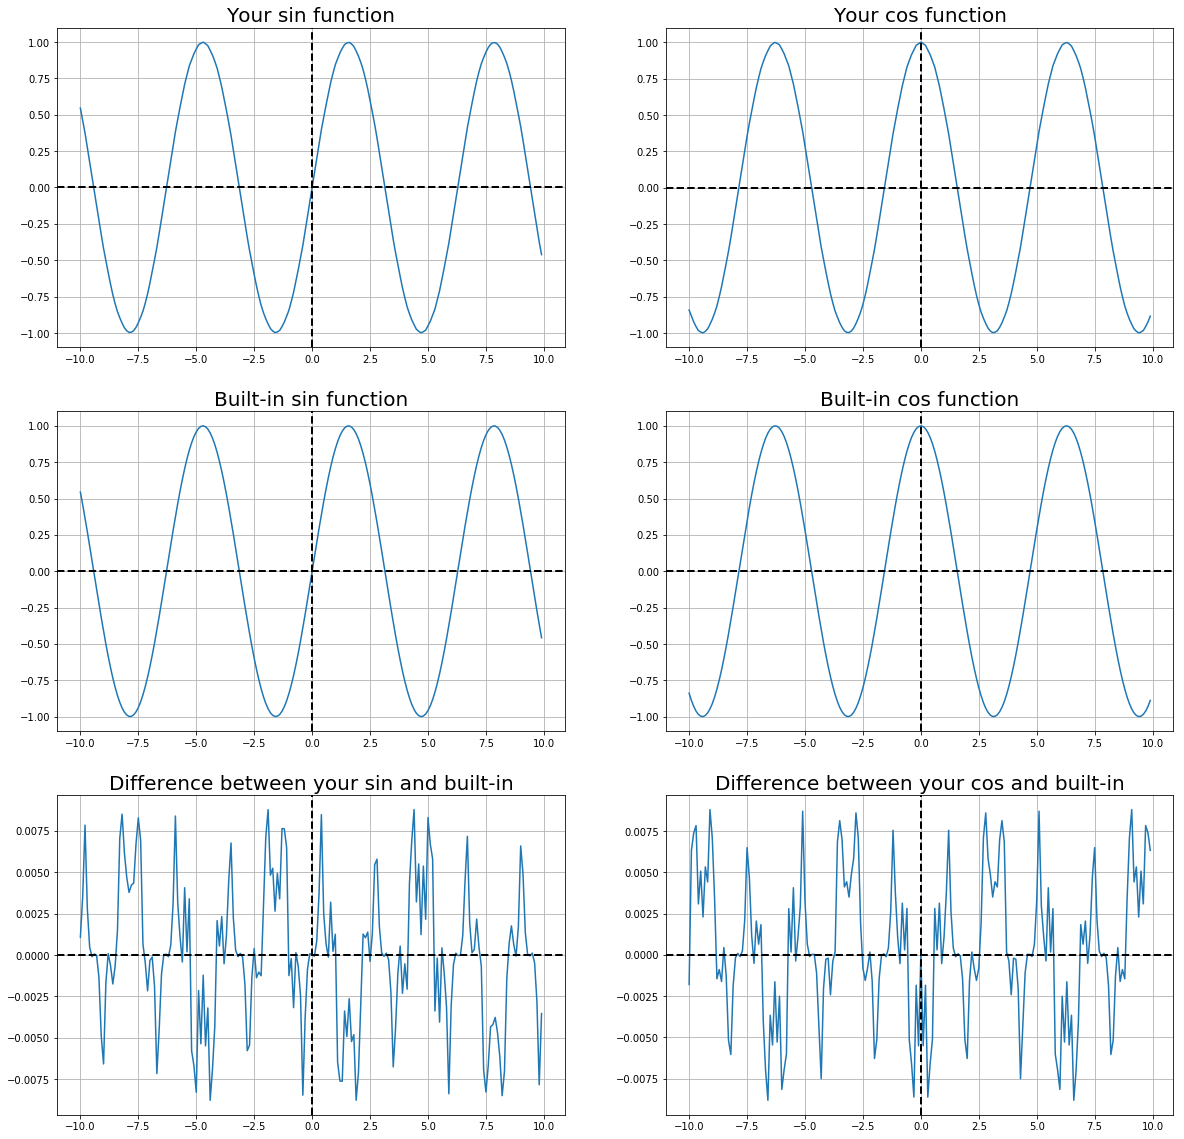

In [27]:
# Let's compare your functions to the built in ones between
# x = -10 and +10
x_coords = [x / 10 for x in range(-100, 100)]

plt.figure(figsize=(20,20))

subplot_num = 321
for description, trig_function in [
    ('Your sin function', my_sin),
    ('Your cos function', my_cos),
    ('Built-in sin function', math.sin),
    ('Built-in cos function', math.cos),
    (
        'Difference between your sin and built-in',
        lambda x: my_sin(x) - math.sin(x)
    ),
    (
        'Difference between your cos and built-in',
        lambda x: my_cos(x) - math.cos(x)
    ),
]:
    plt.subplot(subplot_num)
    plt.title(description, fontsize=20)
    plt.grid()
    plt.plot(
        x_coords,
        [trig_function(x) for x in x_coords]
    )
    plt.axhline(lw=2, color='k', ls='--')
    plt.axvline(lw=2, color='k', ls='--')
    subplot_num += 1

plt.show()